In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [2]:
# set ipython display and matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# pdf and png output
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

%matplotlib inline
#%matplotlib notebook

# matplotlib style
plt.style.use('seaborn-notebook')

plt.close('all')

# Read in the data

/home/shaun/miniconda3/envs/scipy/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


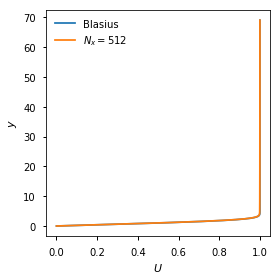

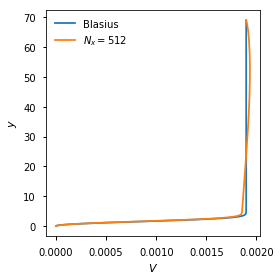

In [12]:
folder='./data/'
filename_Blasius_at_last_x = folder + 'OSS_input.txt.2048y_by_2z.For_Last_x'
filename_64 = folder + '64/v_at_Last_x.csv'
filename_128 = folder + '128/v_at_Last_x.csv'
filename_256 = folder + '256/v_at_Last_x.csv'
filename_512 = folder + '512/v_at_Last_x.csv'

# Last Blasius values
A=np.genfromtxt(filename_Blasius_at_last_x,skip_header=1)
U_last=A[:,0]
V_last=A[:,3]
y_last=A[:,-1]
# 64 case
A=np.genfromtxt(filename_64,delimiter=',',skip_header=1)
y_64=A[:,0]
U_64=A[:,1]
V_64=A[:,2]
# 128 case
A=np.genfromtxt(filename_128,delimiter=',',skip_header=1)
y_128=A[:,0]
U_128=A[:,1]
V_128=A[:,2]
# 256 case
A=np.genfromtxt(filename_256,delimiter=',',skip_header=1)
y_256=A[:,0]
U_256=A[:,1]
V_256=A[:,2]
# 512 case
A=np.genfromtxt(filename_512,delimiter=',',skip_header=1)
y_512=A[:,0]
U_512=A[:,1]
V_512=A[:,2]

fig,ax = plt.subplots(figsize=(4,4))
ax.plot(U_last,y_last,label='Blasius')
ax.plot(U_512,y_512,label=r'$N_x = 512$')
ax.set_xlabel(r'$U$')
ax.set_ylabel(r'$y$')
ax.legend(loc='best',numpoints=1,frameon=False)
fig.tight_layout();
fig.show()
fig,ax = plt.subplots(figsize=(4,4))
ax.plot(V_last,y_last,label='Blasius')
ax.plot(V_512,y_512,label=r'$N_x = 512$')
ax.set_xlabel(r'$V$')
ax.set_ylabel(r'$y$')
ax.legend(loc='best',numpoints=1,frameon=False)
fig.tight_layout();
fig.show()

# calculate $\delta_{99}$ and $L_2$ norm errors

In [13]:
#U_last_interp = sp.interpolate.interp1d(y_last[::2],U_last[::2],kind='cubic')
#V_last_interp = sp.interpolate.interp1d(y_last[::2],V_last[::2],kind='cubic')
#Uinf=1.
#U99=0.99*Uinf
#U_last_interp_fmin = lambda x: U_last_interp(x) - U99
#delta99_U_last_interp = sp.optimize.fsolve(U_last_interp_fmin,1.)
def calc_L2_and_delta99_errors(y,U,V,size,ytrue,Utrue,Vtrue):
    # assume Uinf=1
    Uinf = 1
    U99 = 0.99 * Uinf
    # true values
    U_true_interp = sp.interpolate.interp1d(ytrue,Utrue,kind='cubic')
    V_true_interp = sp.interpolate.interp1d(ytrue,Vtrue,kind='cubic')
    U_true_interp_fmin = lambda x: U_true_interp(x) - U99
    delta99_true_interp = sp.optimize.fsolve(U_true_interp_fmin,1.)
    # errors
    U_interp = sp.interpolate.interp1d(y,U,kind='cubic')
    V_interp = sp.interpolate.interp1d(y,V,kind='cubic')
    #L2 errors U,V
    ylinspace=np.linspace(0,y.max(),1000)
    L2_error = np.linalg.norm(U_interp(ylinspace) - U_true_interp(ylinspace))
    L2V_error = np.linalg.norm(V_interp(ylinspace) - V_true_interp(ylinspace))
    print('L2_'+str(size)+' = ',L2_error)
    print('L2V_'+str(size)+' = ',L2V_error)
    # delta99 error
    U_interp_fmin = lambda x: U_interp(x) - U99
    delta99_interp = sp.optimize.fsolve(U_interp_fmin,1.)
    print('error of delta99_'+str(size)+' = ',np.abs(delta99_interp[0] - delta99_true_interp[0]))
    return L2_error,L2V_error,np.abs(delta99_interp[0] - delta99_true_interp[0])
L2_error_64,L2V_error_64,delta99_error_64 = calc_L2_and_delta99_errors(y_64,U_64,V_64,64,y_256,U_256,V_256)
L2_error_128,L2V_error_128,delta99_error_128 = calc_L2_and_delta99_errors(y_128,U_128,V_128,128,y_512,U_512,V_512)
L2_error_256,L2V_error_256,delta99_error_256 = calc_L2_and_delta99_errors(y_256,U_256,V_256,256,y_512,U_512,V_512)
L2_error_512,L2V_error_512,delta99_error_512 = calc_L2_and_delta99_errors(y_512,U_512,V_512,256,y_512,U_512,V_512)

L2_64 =  0.0007586258119392723
L2V_64 =  0.00016615018991660854
error of delta99_64 =  0.004117114697866686
L2_128 =  0.0007301010686668765
L2V_128 =  7.114834483918057e-05
error of delta99_128 =  0.0015892051074368752
L2_256 =  0.00032680426949034647
L2V_256 =  1.3393390724787349e-05
error of delta99_256 =  0.00020690109304322135
L2_256 =  0.0
L2V_256 =  0.0
error of delta99_256 =  0.0


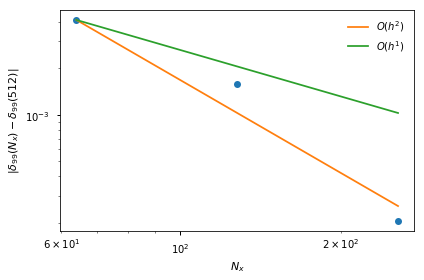

In [14]:
# plot delta 99 error
fig,ax=plt.subplots(figsize=(6,4))
nx=np.array([64,128,256,512])
delta99s=np.array([
    delta99_error_64,
    delta99_error_128,
    delta99_error_256,
    delta99_error_512,
] )
Oh2 = np.array([delta99s[0],delta99s[0]/16.])
Oh1 = np.array([delta99s[0],delta99s[0]/4.])
ax.loglog(nx[:-1],delta99s[:-1],'o')
ax.loglog(nx[::2],Oh2,label=r'$O(h^2)$')
ax.loglog(nx[::2],Oh1,label=r'$O(h^1)$')
ax.set_xlabel(r'$N_x$')
ax.set_ylabel(r'$|\delta_{99}(N_x)-\delta_{99}(512)|$')
ax.legend(loc='best',numpoints=1,frameon=False)
fig.tight_layout();

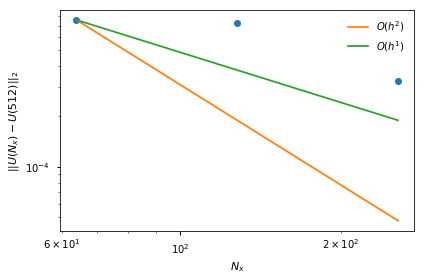

In [15]:
# plot L2 U
fig,ax=plt.subplots(figsize=(6,4))
nx=np.array([64,128,256,512])
L2s=np.array([
    L2_error_64,
    L2_error_128,
    L2_error_256,
    L2_error_512,
] )
Oh2 = np.array([L2s[0],L2s[0]/16.])
Oh1 = np.array([L2s[0],L2s[0]/4.])
ax.loglog(nx[:-1],L2s[:-1],'o')
ax.loglog(nx[::2],Oh2,label=r'$O(h^2)$')
ax.loglog(nx[::2],Oh1,label=r'$O(h^1)$')
ax.set_xlabel(r'$N_x$')
ax.set_ylabel(r'$||U(N_x)-U(512)||_2$')
ax.legend(loc='best',numpoints=1,frameon=False)
fig.tight_layout();

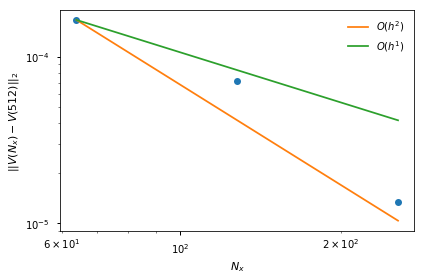

In [16]:
# plot L2 U
fig,ax=plt.subplots(figsize=(6,4))
nx=np.array([64,128,256,512])
L2Vs=np.array([
    L2V_error_64,
    L2V_error_128,
    L2V_error_256,
    L2V_error_512,
] )
Oh2 = np.array([L2Vs[0],L2Vs[0]/16.])
Oh1 = np.array([L2Vs[0],L2Vs[0]/4.])
ax.loglog(nx[:-1],L2Vs[:-1],'o')
ax.loglog(nx[::2],Oh2,label=r'$O(h^2)$')
ax.loglog(nx[::2],Oh1,label=r'$O(h^1)$')
ax.set_xlabel(r'$N_x$')
ax.set_ylabel(r'$||V(N_x)-V(512)||_2$')
ax.legend(loc='best',numpoints=1,frameon=False)
fig.tight_layout();